# Import Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# Get The Data

In [39]:
data = pd.read_csv("/content/creditcard.csv")

# Let's Look At The Data

In [40]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [42]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [43]:
data.corr()["Class"]

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

# NAN Value

In [44]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

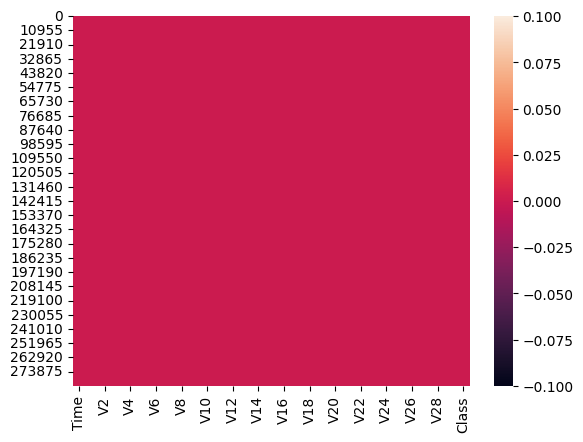

In [45]:
sns.heatmap(data.isna())

# Duplicates

In [46]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [47]:
data.duplicated().sum()

1081

In [48]:
data.drop_duplicates(inplace = True)

In [49]:
data["Class"].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [50]:
data.shape

(283726, 31)

# EDA

This chart shows us that the data is extremely unbalanced

<Axes: xlabel='Class', ylabel='count'>

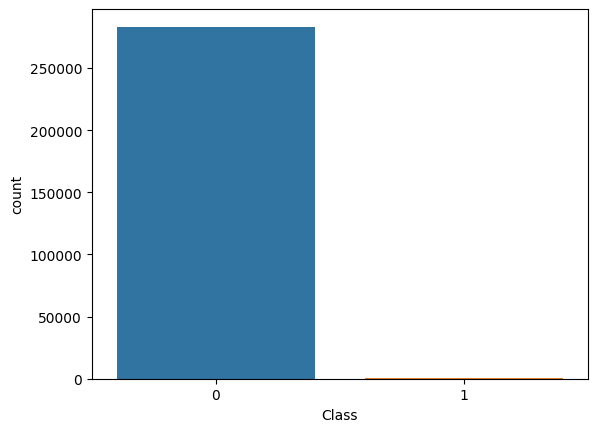

In [51]:
sns.countplot(data = data  , x = "Class")

<Axes: xlabel='Time', ylabel='Amount'>

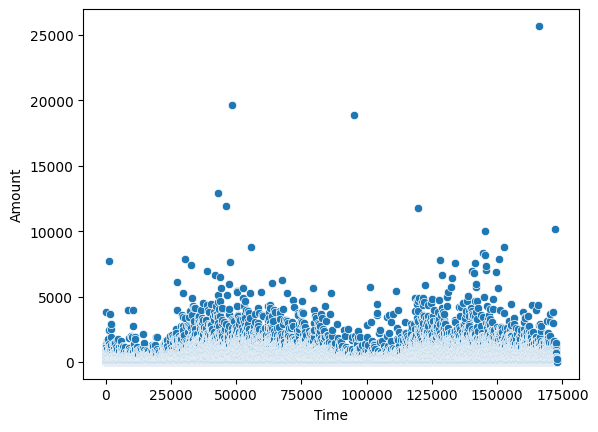

In [52]:
sns.scatterplot(data = data , x = "Time" , y = "Amount")

# Outliers

In [53]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Text(0.5, 1.0, 'Boxplot')

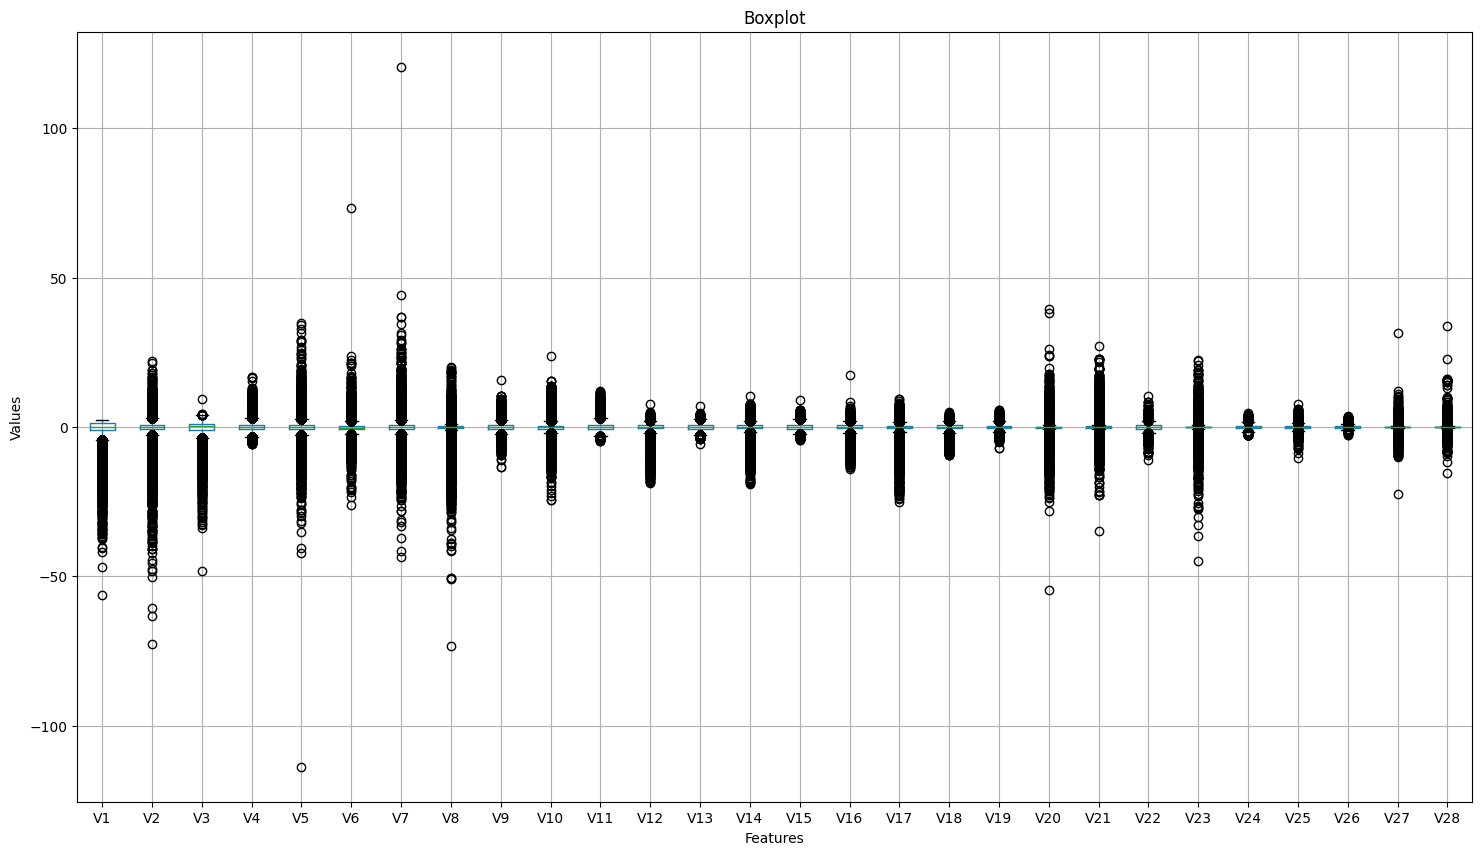

In [17]:
attr = [ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       ]
plt.figure(figsize=(18, 10))
data[attr].boxplot()


plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot')


# Imbalance

**As we saw on data visualization that the data is extremly un balance so we will try to fix**

In [18]:
data["Class"].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [19]:
data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [20]:
majority = data[data["Class"]==0]
minority = data[data["Class"]==1]


In [21]:
majority_sample = majority.sample(n = 473)

In [22]:
new_data = pd.concat([majority_sample , minority ] , axis = 0)

In [23]:
new_data.shape

(946, 31)

In [24]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
151749,96168.0,2.084960,0.131170,-2.086123,0.517891,0.792790,-1.027728,0.623072,-0.522113,1.707720,...,-0.027371,0.300048,-0.071871,0.556496,0.563124,-0.131880,-0.091415,-0.072431,27.63,0
47414,43203.0,-5.165293,-3.969299,0.915167,0.108152,2.853404,-1.290842,0.063425,-0.087645,0.105056,...,-0.876476,0.771683,3.047736,-0.176786,1.320332,1.267799,0.952355,-0.819875,2.00,0
5915,6512.0,-0.577251,1.086163,1.845979,2.426396,0.313681,0.075951,0.096196,0.025674,0.463471,...,0.014574,0.379091,-0.041498,-0.176392,-0.106181,0.131148,0.168584,0.126100,10.62,0
700,530.0,1.255931,0.317615,0.293256,0.697224,-0.413810,-1.081986,0.053119,-0.175252,0.108262,...,-0.293567,-0.871804,0.134498,0.326186,0.199886,0.096395,-0.026373,0.029732,1.98,0
46242,42696.0,0.593328,-0.407230,-0.407098,1.393112,0.016840,0.052242,0.371861,0.037728,-0.358610,...,0.093777,-0.346158,-0.301593,-0.410192,0.347487,-0.447127,-0.002620,0.088834,294.48,0


In [25]:
new_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91144.562368,0.027021,-0.176106,0.078049,0.045646,-0.143583,0.085408,0.078000,-0.007942,-0.040053,...,-0.089633,-0.023413,-0.079104,0.037639,-0.015023,0.032390,0.010235,0.011650,0.027032,108.815011
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [26]:
new_data["Class"].value_counts()

0    473
1    473
Name: Class, dtype: int64

# Split The Data

In [27]:
new_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [28]:
X = new_data.drop(columns ="Class" , axis = 1  )
y = new_data["Class"]

In [29]:
X.shape

(946, 30)

In [30]:
y.shape

(946,)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y , random_state=42)

# Normalization

**As we see here the features mean is almost nearst but the time have a high mean so we should fix it**

In [32]:
new_data.describe().mean()

Time      70343.171520
V1          114.848039
V2          119.854801
V3          114.400193
V4          120.626149
V5          114.701249
V6          120.329654
V7          118.293956
V8          116.289053
V9          117.094803
V10         115.925028
V11         120.574273
V12         115.605284
V13         118.348458
V14         115.497941
V15         118.174876
V16         116.662262
V17         115.606059
V18         117.506482
V19         118.727613
V20         118.057890
V21         119.154369
V22         118.304923
V23         117.050045
V24         118.447741
V25         118.079127
V26         118.515142
V27         117.971431
V28         119.867917
Amount     1473.062375
Class       118.687533
dtype: float64

In [33]:
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


# Model Bulding And Evaluation

In [34]:
def evaluate(model):
    print(f'accuracy on train: {model.score(X_train, y_train)}')
    print(f'accuracy on test: {model.score(X_test, y_test)}')

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f'\n\n{cm}')
    print(f'\n\n{classification_report(y_test, y_pred)}')

    scores = cross_val_score(model, X, y, scoring="recall", cv=10)
    print(f'10-Fold cross validation avg score: {scores.mean()}')
    print("---------------------------------------------------------")

**Logisteic Regression**

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Assuming you have your feature data in X and target variable in y

# Create an instance of LogisticRegression
logreg = LogisticRegression()

# Define the range of C values to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=10)
grid_search.fit(X, y)

# Get the best C value and corresponding score
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [36]:
best_C , best_score

(100, 0.929104143337066)

In [37]:
logistic = LogisticRegression(C=0.1, max_iter=1000)
logistic.fit(X_train,y_train)

print("Logistic regression:\n")
evaluate(logistic)

Logistic regression:

accuracy on train: 0.9378306878306878
accuracy on test: 0.9421052631578948


[[92  3]
 [ 8 87]]


              precision    recall  f1-score   support

           0       0.92      0.97      0.94        95
           1       0.97      0.92      0.94        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

10-Fold cross validation avg score: 0.8988031914893616
---------------------------------------------------------
